In [1]:
import numpy as np
import networkx as nx
from bokeh.plotting import figure, output_notebook, show, vplot
import matplotlib.pyplot as plt

import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
graph = nx.read_gpickle('/home/elisa/Documents/Projetos/TCC/data/charlie/original_graph.gpickle')

In [660]:
# def create_nodes_list(graph, raiz, nodes, size):
#     if len(nodes) >= size:
#         return nodes
#     else:
#         nodes.append(raiz)
#         for i in graph.edges(raiz):
#             node = i[1]
#             if node not in nodes:
#                 if graph.edges(node) == []:
#                     nodes.append(node)
#                 else:
#                     create_nodes_list(graph,node,nodes,size)
#         return nodes

# def create_subgraph(graph,raiz,size):
#     nodes = create_nodes_list(graph,raiz,nodes=[],size=size)
#     subgraph = graph.subgraph(nodes)
#     return subgraph

# H = create_subgraph(graph, 0)

## Calculando Probabilidade de Conexão

In [661]:
## cria matriz.
## Coluna > influenciadores, Index > Influenciados
## Ex: df['www.ptjornal.com']['www.meioemensagem.com.br'] = 2 -> coluna do ptjornal e linha do meioemensagem
## df['www.ptjornal.com'] retorna a coluna, ou seja, retorna todos os veiculos que ptjornal influenciou

##                                  Influenciadores
##                           domain[0] domain[1] domain[2]
##               domain[0]      2          0         2
## Influenciados domain[1]      3          0         0        ->>>>      df[domain[0]][domain[1]] = 3
##               domain[2]      5          2         1     

In [4]:
def create_matrix_domain(graph):
    ## cria lista de domínios
    domain_list = []
    for pos in graph.nodes():
        node = graph.node[pos]
        d = node['domain']
        if d not in domain_list:
            domain_list.append(d)
    
    df = pd.DataFrame(0, index = domain_list, columns = domain_list)
    
    for pos in graph.nodes():
        node = graph.node[pos]
        d = node['domain']
        successors = graph.successors(pos)
        for suc in successors:
            df[d][graph.node[suc]['domain']] += 1 
        
    return [domain_list, df] 
    

In [5]:
domain_list, domain_matrix = create_matrix_domain(graph)

In [6]:
domain_matrix.head()

,www.ptjornal.com,www.meioemensagem.com.br,br.noticias.yahoo.com,estadao.feedsportal.com,www.dgabc.com.br,www.jb.com.br,opiniaoenoticiascombr.feedsportal.com,feeds.jn.pt,www.gazetadopovo.com.br,bahianoticias.feedsportal.com,...,saraiva13.blogspot.com,rss.computerworld.com.br,rss.idgnow.com.br,mobilexpert.com.br,www.nossasenhoradobrasil.com.br,www.oribatejo.pt,agendacult.wordpress.com,www.brasilescola.com,www.portalmetropole.com,blogjp.jovempan.uol.com.br
www.ptjornal.com,5,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
www.meioemensagem.com.br,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
br.noticias.yahoo.com,1,1,242,7,21,15,8,6,20,0,...,0,0,0,0,0,0,0,0,0,0
estadao.feedsportal.com,0,2,11,12,2,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
www.dgabc.com.br,0,0,20,1,10,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [609]:
# domains_probs = domain_matrix.transpose()/domain_matrix.sum(1)
# domains_probs = domains_probs.transpose()

In [7]:
domain_matrix.to_csv('/home/elisa/Documents/Projetos/TCC/data/charlie/matrix_domains.csv')

##Analises

In [620]:
Q = domains_probs.as_matrix()

In [631]:
np.fill_diagonal(Q,0)

In [636]:
for pos,row in enumerate(Q):
    if np.any(np.isinf(row)):
        Q[pos] = 0
        

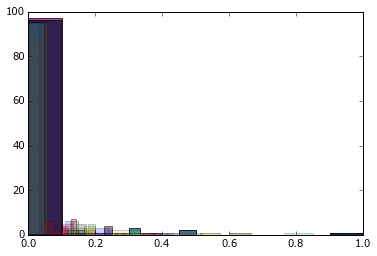

In [640]:
for i in range(0,93):
    plt.hist(Q[i], alpha = 0.2)

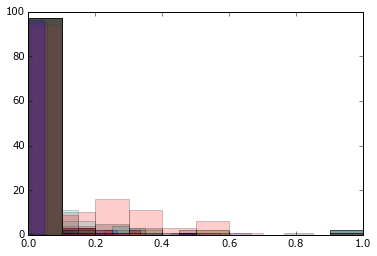

In [639]:
for i in range(0,93):
    plt.hist(Q[:,i], alpha = 0.2)

## Construindo Grafo Completo

In [30]:
domain_matrix = pd.read_csv('/home/elisa/Documents/Projetos/TCC/data/charlie/matrix_domains.csv', index_col=0)

In [672]:
###CONFERIR!!!!!!!!!!
def create_complete_graph(graph,matrix):
    G = nx.MultiDiGraph()
    G.add_nodes_from(graph.nodes(data=True))
    
    for i in G.nodes():
        temp_list =  G.nodes().copy()
        temp_list.remove(i)
        i_domains_column = matrix[G.node[i]['domain']]
        for j in temp_list:
            prob = i_domains_column[G.node[j]['domain']]
            G.add_edge(j,i, probability=prob)
    return G

In [37]:
## quero que minha matriz seja Aji, j --> i
## matriz foi criada de forma em que as colunas são os influenciadores e as linhas os influenciados!

def create_complete_adjacency(graph,matrix):
    df = pd.DataFrame(0, index = graph.nodes(), columns = graph.nodes())
    for column in graph.nodes():
        i_domains_column = matrix[graph.node[column]['domain']]
        for row in graph.nodes():
            prob = i_domains_column[graph.node[row]['domain']]
            df[column][row] = prob
            
    return df
    

In [38]:
## graph_complete[1][0] -> no 1 ----> no 0

In [39]:
# graph_complete = create_complete_graph(graph, domain_matrix)
matrix_complete = create_complete_adjacency(graph, domain_matrix)

In [40]:
##matrix_complete[0][1] ---- no 0 influenciar o no 1
matrix_complete.head()

,0,1,2,3,4,5,6,7,8,9,...,2105,2106,2107,2108,2109,2110,2111,2112,2113,2114
0,5,0,1,0,0,0,0,0,1,0,...,1,1,0,0,1,0,0,0,0,0
1,1,0,1,0,0,0,0,0,1,0,...,1,1,0,0,1,1,0,0,0,0
2,1,1,242,7,7,7,7,7,242,21,...,242,242,0,0,242,76,8,8,0,8
3,0,2,11,12,12,12,12,12,11,2,...,11,11,0,0,11,3,0,0,0,0
4,0,2,11,12,12,12,12,12,11,2,...,11,11,0,0,11,3,0,0,0,0


In [ ]:
as_numpy = matrix_complete.as_matrix()

In [ ]:
A = graph.nodes()

In [ ]:
A

In [53]:
l_d = []
for i in A:
    l_d.append(graph.node[i]['domain'])

In [ ]:
len(l_d)

In [741]:
##l_d[0] corresponde ao dominio do artigo na linha 0 da matriz de adjacencia.
## ou seja, matrix_complete[0] = ld[0]

In [52]:
np.savetxt('/home/elisa/Documents/Projetos/TCC/data/charlie/original_graph_nodes.csv', A, delimiter=',')

In [ ]:
f=open('/home/elisa/Documents/Projetos/TCC/data/charlie/graph_original_domains_each_node.txt','w')
for item in l_d:
  f.write("%s\n" % item)

In [43]:
## prob de 0 ser influenciado por 1
as_numpy

array([[  5,   0,   1, ...,   0,   0,   0],
       [  1,   0,   1, ...,   0,   0,   0],
       [  1,   1, 242, ...,   8,   0,   8],
       ..., 
       [  0,   0,  10, ...,   3,   0,   3],
       [  0,   0,   1, ...,   0,   0,   0],
       [  0,   0,  10, ...,   3,   0,   3]])

In [44]:
np.fill_diagonal(as_numpy, 0)

In [45]:
# nx.write_gpickle(graph_complete, 'graph_complete.gpickle')
# matrix_complete.to_csv('matrix_complete.csv')
np.savetxt('/home/elisa/Documents/Projetos/TCC/data/charlie/graph_complete.csv', as_numpy, delimiter=',')


## Analise Matriz

In [652]:
G = G_full.astype(float).as_matrix()

In [653]:
G = G.T

In [655]:
np.fill_diagonal(G,0)

In [649]:
np.savetxt('matrix_complete-full.csv', G, delimiter=',')

In [545]:
d = []
for row in range(0,G.shape[0]):
    d.append(np.count_nonzero(G[row,:]))

(array([ 106.,   40.,    4.,   51.,   83.,  131.,  305.,  206.,  451.,  656.]),
 array([    0. ,   174.7,   349.4,   524.1,   698.8,   873.5,  1048.2,
         1222.9,  1397.6,  1572.3,  1747. ]),
 <a list of 10 Patch objects>)

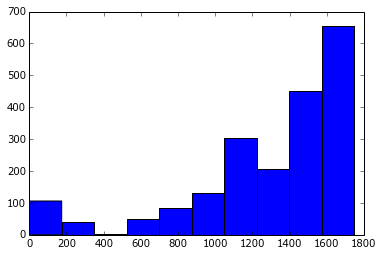

In [616]:
plt.hist(d)

In [553]:
G = G/G.sum(0)

In [578]:
G

array([[  0.,   0.,   1., ...,   0.,   0.,   0.],
       [  1.,   0.,   1., ...,   0.,   0.,   0.],
       [  1.,   1.,   0., ...,   8.,   0.,   8.],
       ..., 
       [  0.,   0.,  10., ...,   0.,   0.,   3.],
       [  0.,   0.,   1., ...,   0.,   0.,   0.],
       [  0.,   0.,  10., ...,   3.,   0.,   0.]])

In [581]:
1/G[0].sum()

0.0012722646310432571

In [584]:
for pos,i in enumerate(G):
    G[pos] = G[pos]/G[pos].sum()

In [587]:
G

array([[  0.00000000e+00,   0.00000000e+00,   1.27226463e-03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.23152709e-03,   0.00000000e+00,   1.23152709e-03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  6.19287077e-06,   6.19287077e-06,   0.00000000e+00, ...,
          4.95429661e-05,   0.00000000e+00,   4.95429661e-05],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   1.54083205e-03, ...,
          0.00000000e+00,   0.00000000e+00,   4.62249615e-04],
       [  0.00000000e+00,   0.00000000e+00,   1.54559505e-03, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.54083205e-03, ...,
          4.62249615e-04,   0.00000000e+00,   0.00000000e+00]])

##### In degrees

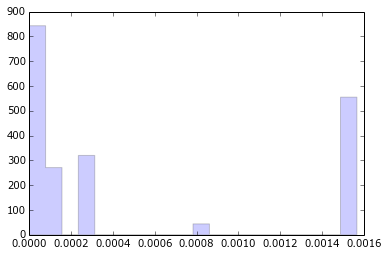

In [619]:
for pos in range(0,10):
    plt.hold()
    plt.hist(G[pos],bins = 20, histtype='stepfilled', alpha=0.2)

plt.show()

 ## Simulações

In [395]:
# M = pd.read_csv('matrix_complete.csv', index_col=0)
H = create_subgraph(graph, 0, 400)
domain_list, domain_matrix = create_matrix_domain(H)
matrix_complete = create_complete_adjacency(H, domain_matrix)

In [398]:
M

array([[  1.,   1.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   1., ...,   0.,   1.,   0.],
       [  0.,   1.,  69., ...,   0.,  69.,  17.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   1.,  69., ...,   0.,  69.,  17.],
       [  0.,   0.,   8., ...,   0.,   8.,   9.]])

In [394]:
M

array([[  0.,   1.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   1., ...,   0.,   1.,   0.],
       [  0.,   1.,   0., ...,   0.,  69.,  17.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   1.,  69., ...,   0.,   0.,  17.],
       [  0.,   0.,   8., ...,   0.,   8.,   0.]])

In [397]:
M = M.astype(float).as_matrix()

In [385]:
M /= M.max()

In [386]:
np.savetxt('matrix_completevs.csv', M, delimiter=',')

$$ \dfrac{d\rho^{I}_{i}(t)}{dt} = - \rho^{I}_{i}(t) + \lambda [1-\rho^{I}_{i}(t)] \sum^{N}_{j=i} \alpha_{ij}\rho^{I}_{j}(t)$$